In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
data=pd.Series(np.random.randn(10000)*100)
data.head(10)

0    -74.765145
1     69.167867
2     10.090212
3     78.665287
4    164.871882
5     -6.846294
6     -1.309400
7     52.867169
8     23.967535
9    -28.486147
dtype: float64

In [4]:
std=data.std()
mean=data.mean()
std,mean

(101.05810884088507, 1.2543483443840922)

In [5]:
stats.kstest(data,'norm',(mean,std))

KstestResult(statistic=0.005367090273591502, pvalue=0.9355330991610977)

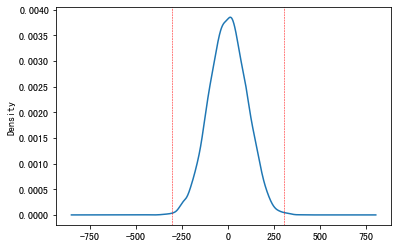

In [10]:
data.plot.kde()
plt.axvline(data.mean()+3*std,lw=0.5,ls='--',color='red')
plt.axvline(data.mean()-3*std,lw=0.5,ls='--',color='red')


In [19]:
error=data[abs(data-mean)>3*std]
data_c=data[abs(data-mean)<=3*std]

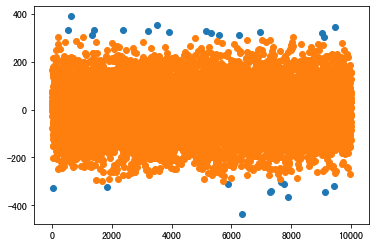

In [21]:
plt.scatter(error.index,error.values)
plt.scatter(data_c.index,data_c.values)

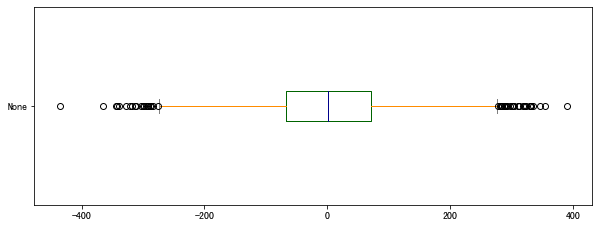

In [27]:
fig=plt.figure(figsize=(10,8))
ax1=fig.add_subplot(211)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False,ax=ax1,color=color)

In [30]:
s=data.describe()
q1=s['25%']
q3=s['75%']
iqr=q3-q1
iqr

137.901392318837

In [31]:
low_limit=q1-1.5*iqr
high_limit=q3+1.5*iqr

In [41]:
error=data[(data<low_limit)|(data>high_limit)]
data_c=data[(data>=low_limit)&(data<=high_limit)]

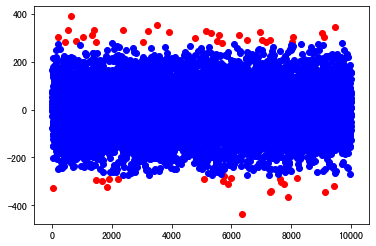

In [42]:
plt.scatter(error.index,error.values,color='red')
plt.scatter(data_c.index,data_c.values,color='blue')

In [39]:
s

count    10000.000000
mean         1.254348
std        101.058109
min       -435.735317
25%        -67.383526
50%          2.021910
75%         70.517867
max        390.178840
dtype: float64